In [4]:
import sys
sys.path.append('../')
import utils
import models
import numpy as np 
import matplotlib.pyplot as plt 
import time

dataset_dir = 'D:\\projects\\_datasets\\SICE\\Dataset_Part1\\'

x_data, y_data = utils.load_dataset_sice(dataset_dir, 'path')
    
data_keys = list(x_data.keys())

num_data = len(x_data)
last_index_train = int(num_data * 0.7)
last_index_val = int(num_data * 0.9)

x_train = models.split_dictionary(x_data, data_keys[:last_index_train])
y_train = models.split_dictionary(y_data, data_keys[:last_index_train])

x_val = models.split_dictionary(x_data,  data_keys[last_index_train: last_index_val])
y_val = models.split_dictionary(y_data,  data_keys[last_index_train: last_index_val])

x_test = models.split_dictionary(x_data,  data_keys[last_index_val: -1])
y_test = models.split_dictionary(x_data,  data_keys[last_index_val: -1])

In [5]:
train_generator = models.data_generator(x_train, y_train, dataset_type='path', batch_size=4, use_random_crop=True)
val_generator = models.data_generator(x_val, y_val, dataset_type='path', batch_size=4, use_random_crop=True)

delay : 0.8946089744567871


<Figure size 432x288 with 0 Axes>

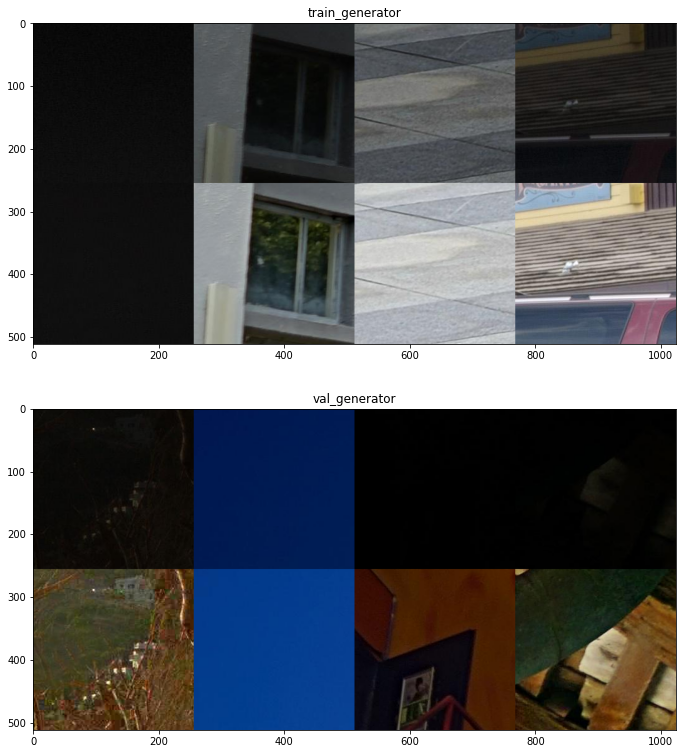

delay : 0.8517215251922607


<Figure size 432x288 with 0 Axes>

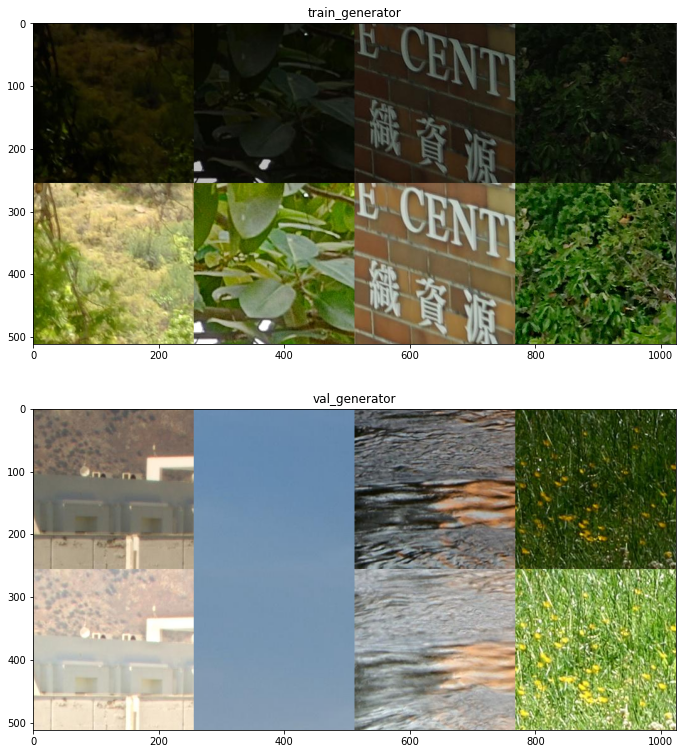

delay : 0.8267908096313477


<Figure size 432x288 with 0 Axes>

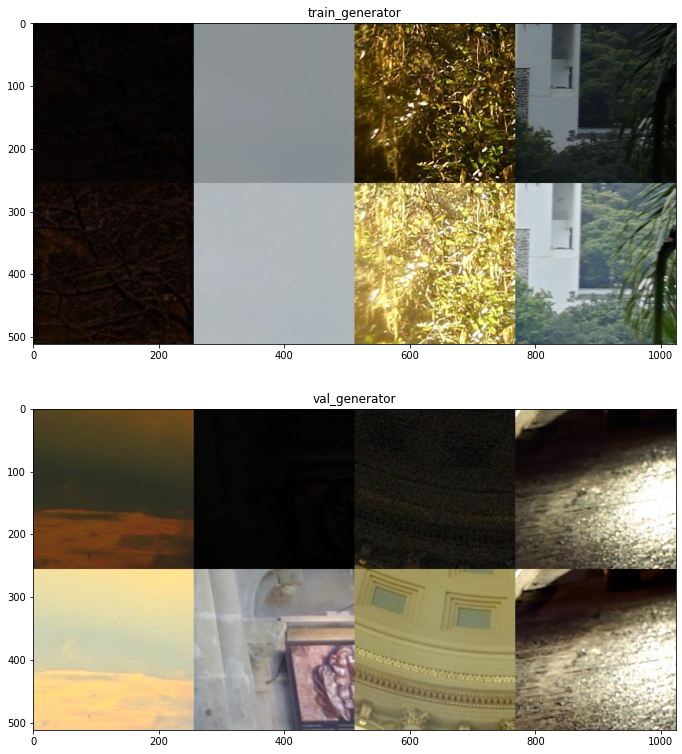

In [7]:
for _ in range(3):
    start = time.time()
    x_t, y_t = next(train_generator)
    print('delay :', time.time() - start)
    
    x_v, y_v = next(val_generator)

    xx_t = np.hstack([x for x in x_t])
    yy_t = np.hstack([y for y in y_t])
    xy_t = np.vstack([xx_t, yy_t])

    xx_v = np.hstack([x for x in x_v])
    yy_v = np.hstack([y for y in y_v])
    xy_v = np.vstack([xx_v, yy_v])
    # bgr 2 rgb
    xy_t = xy_t[:,:,::-1]
    xy_v = xy_v[:,:,::-1]
   
    plt.figure() 
    fig, axs = plt.subplots(2, 1,figsize = (13,13))
    axs[0].imshow(xy_t)
    axs[0].set_title('train_generator')
    axs[1].imshow(xy_v)
    axs[1].set_title('val_generator')
    plt.show()
  
